In [32]:
import pandas as pd # importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
diab=pd.read_csv("D:\\Sem 4\\ML\\week2\\diabetes.csv")
diab.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [34]:
diab["class"] = diab["class"].map({"tested_positive": 1, "tested_negative": 0})
diab["class"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [35]:
mean_dev = np.mean(abs(diab.loc[:, diab.columns != 'class'] - np.mean(diab.loc[:, diab.columns != 'class'])))
mean_dev

preg     2.771620
plas    25.181793
pres    12.639425
skin    13.659627
insu    84.505079
mass     5.842270
pedi     0.247309
age      9.586405
dtype: float64

In [36]:
std_dev = np.std(diab.loc[:, diab.columns != 'class'])
std_dev

preg      3.367384
plas     31.951796
pres     19.343202
skin     15.941829
insu    115.168949
mass      7.879026
pedi      0.331113
age      11.752573
dtype: float64

<AxesSubplot:>

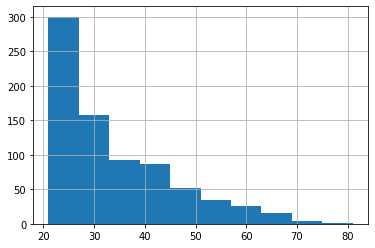

In [37]:
diab["age"].hist()

In [38]:
corr=diab[["age", "class", "mass"]].corr() 
corr


,age,class,mass
age,1.000000,0.238356,0.036242
class,0.238356,1.000000,0.292695
mass,0.036242,0.292695,1.000000


([<matplotlib.axis.XTick at 0x187e7beb790>,
 [Text(0, 0, ''), Text(0, 0, '')])

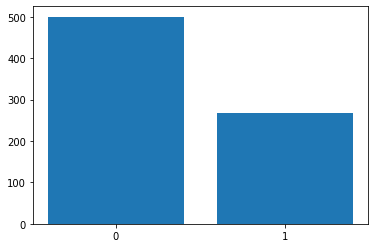

In [39]:
base = diab.groupby("class", as_index = False).count()
x = base["class"]
y = base["age"]
plt.bar(x,y)
plt.xticks([0,1])

In [40]:
#the classes are not balanced, the 1(aka 'tested_positive') class is almost half of the 'tested_negative' class

In [57]:
x1 = diab.loc[:, diab.columns != 'class']
y1 = diab["class"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3) 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
model.fit(x_train,y_train)# fitting data points to model

c:\users\yaswa\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred = model.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[136,  17],
       [ 33,  45]], dtype=int64)

<AxesSubplot:>

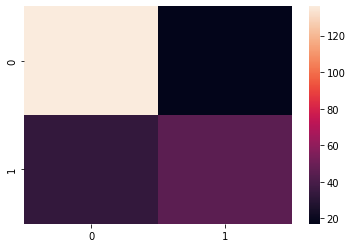

In [60]:
sns.heatmap(cm)

In [61]:
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
tp = cm[1,1]
acc = (tp+tn)/(tp+tn+fp+fn)
tpr = tp/(fn+tp)
tnr = tn/(tn+fp)

print("accuracy = ", acc)
print("TPR = ", tpr)
print("TNR = ", tnr)

accuracy =  0.7835497835497836
TPR =  0.5769230769230769
TNR =  0.8888888888888888


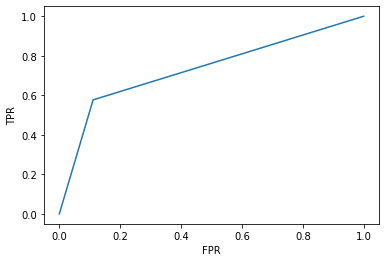

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
falsepr, truepr, _ = roc_curve(y_test, y_pred)
plt.plot(falsepr,truepr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [63]:
r =  roc_auc_score(y_test,y_pred)
r

0.7329059829059829

In [64]:
#in general, a curve moving towards the top and left of and roc curve means the classifier is better
#a 45 degree line corresponds to random predictions
#The area under the curve is 0.73, indicating it is a decent model
#The accuracy could be improved by scaling the input values